## Variable Initialization and Imports

In [1]:
import pandas as pd
from sklearn import linear_model
import csv
import matplotlib.pyplot as plt
from eyeInfo import EyeInfo
import numpy as np

output = './csv/output/outright.csv'
train_imput = './csv/center_20_fixed_train_data.csv'
predict_input = './csv/center_20_predict_train_data.csv'

fieldnames = ['screen_x', 'screen_y', 'right_iris_x','right_iris_y']

calib_points = [
    { "x": 200, "y": 200 },
    { "x": 1672, "y": 200 },
    { "x": 936, "y": 472 },
    { "x": 200, "y": 744 },
    { "x": 1672, "y": 744 }
]

def train_to_validate_calib():
    dataset_train_path = train_imput
    dataset_predict_path = predict_input

    data = pd.read_csv(dataset_train_path)

    X = data[[ 'right_iris_x', 'right_iris_y']]
    y = data[['point_x', 'point_y']]
    print(X)

    model = linear_model.LinearRegression()
    model.fit(X, y)

    dados_teste = pd.read_csv(dataset_predict_path)
    dados_teste.drop(['left_iris_x', 'left_iris_y'], axis=1, inplace=True)
    eye_positions = dados_teste[['right_iris_x', 'right_iris_y']].values
    previsoes = model.predict(dados_teste)

    combined_predictions = np.concatenate((previsoes, eye_positions), axis=1)
    return combined_predictions.tolist()

## Reading CSVs

In [2]:
teste = train_to_validate_calib()

with open(output, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    writer.writeheader()

    for row in teste:
        writer.writerow({'screen_x': row[0], 'screen_y': row[1],'right_iris_x': row[2],'right_iris_y': row[3]})

    right_iris_x  right_iris_y
0     303.610382    224.845856
1     303.797791    224.915192
2     303.755066    225.305023
3     303.604950    224.948730
4     303.337891    225.027832
..           ...           ...
95    296.738831    229.062408
96    296.329437    229.094238
97    296.315918    229.072815
98    296.513214    228.831451
99    296.070312    228.586395

[100 rows x 2 columns]


## Instancing class and initializing points 

In [3]:
eye = EyeInfo(calib_points=calib_points, dataset=output, left=False)
eye.init_screen_resolution()
eye.init_calib_points()
eye.init_points()

## Initializing left eye, right eye and prediction arrays to plot

In [4]:
calib_points_x , calib_points_y = eye.get_points(eye.calib_points)
right_eye_x, right_eye_y = eye.get_points(eye.right_eye)
# left_eye_x, left_eye_y = eye.get_points(eye.left_eye)
prediction_x, prediction_y = eye.get_points(eye.prediction)

max_x = eye.get_max_object('x')
max_y = eye.get_max_object('y')
min_x = eye.get_min_object('x')
min_y = eye.get_min_object('y')
print(min_y)

{'x': 1181.3754492458465, 'y': 291.20465530242654}


## Plotting data

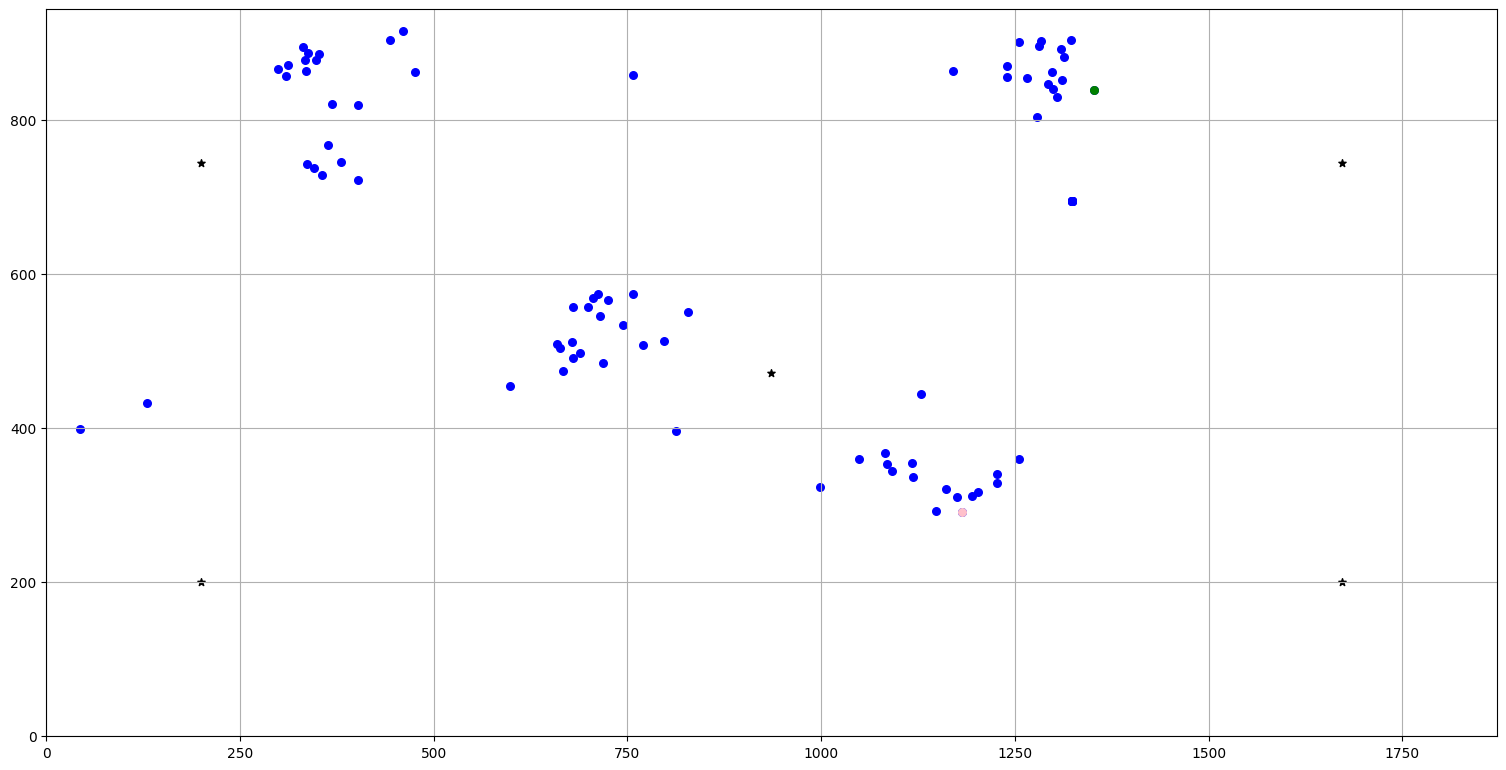

In [5]:
right_color = 'blue'
left_color= 'red'
calib_colors= 'black'
prediction_color = 'blue'
highlight_max_color = 'green'
highlight_min_color = 'pink'
marker_size = 30

# plt.scatter(right_eye_x, right_eye_y, marker='o', color='blue', label='right eye')
# plt.scatter(left_eye_x, left_eye_y, marker='o', color='red', label='left eye')
plt.scatter(calib_points_x, calib_points_y, marker="*", color=calib_colors ,s=marker_size, label='calib points')
plt.scatter(prediction_x, prediction_y, marker='o', color=prediction_color ,s=marker_size, label='predicted value')
if(max_x != max_y):
    plt.scatter(max_x['x'], max_x['y'], marker='o', color=highlight_max_color ,s=marker_size, label='predict max x point')
    plt.scatter(max_y['x'], max_y['y'], marker='o', color=highlight_max_color ,s=marker_size, label='predict max y point')
else:
    plt.scatter(max_x['x'], max_x['y'], marker='o', color=highlight_max_color ,s=marker_size, label='max general point')
    print(f'same max: {max_x}')

if(min_x != min_y):
    plt.scatter(min_x['x'], min_x['y'], marker='o', color=highlight_min_color ,s=marker_size, label='predict min x point')
    plt.scatter(min_y['x'], min_y['y'], marker='o', color=highlight_min_color ,s=marker_size, label='predict min y point')
else:
    plt.scatter(min_x['x'], min_x['y'], marker='o', color=highlight_min_color ,s=marker_size, label='min general point')
    print(f'same min: {min_x}')
fig = plt.gcf()
fig.set_size_inches(eye.k_screen_width / 100, eye.k_screen_height / 100)

ax = plt.gca()
ax.set_xlim(0, eye.k_screen_width)
ax.set_ylim(0, eye.k_screen_height)

plt.grid(True)

plt.show()